<a href="https://colab.research.google.com/github/carlosgalan01/Reinforcement-Learning/blob/main/My_upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

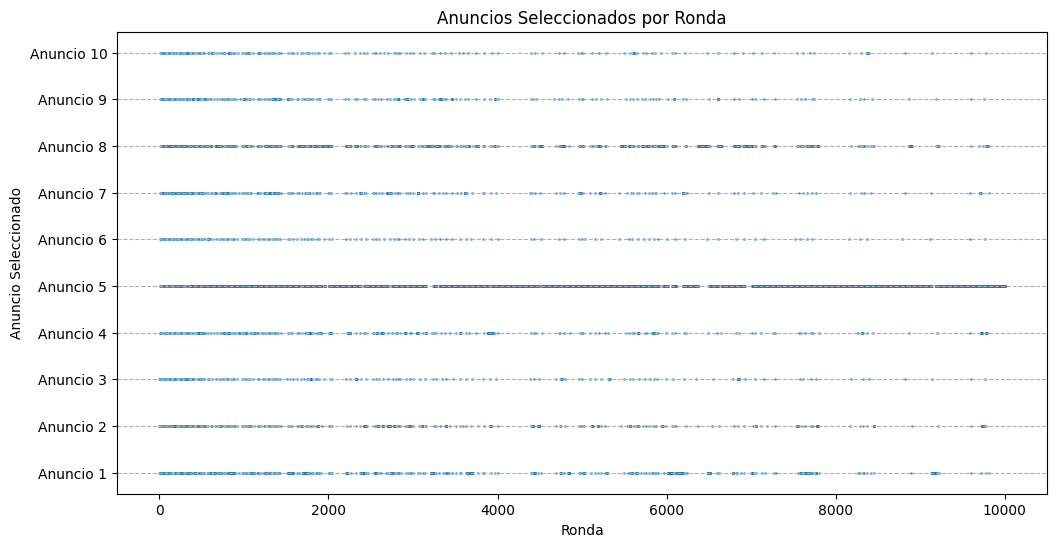

In [ ]:
# prompt: quiero ver visualmente qué ads se han seleccionado en cada ronda en un grafico. importante verlo en cada ronda

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(range(N), ads_selected, s=1, alpha=0.6)
plt.xlabel('Ronda')
plt.ylabel('Anuncio Seleccionado')
plt.title('Anuncios Seleccionados por Ronda')
plt.yticks(range(d), [f'Anuncio {i+1}' for i in range(d)])
plt.grid(axis='y', linestyle='--')
plt.show()

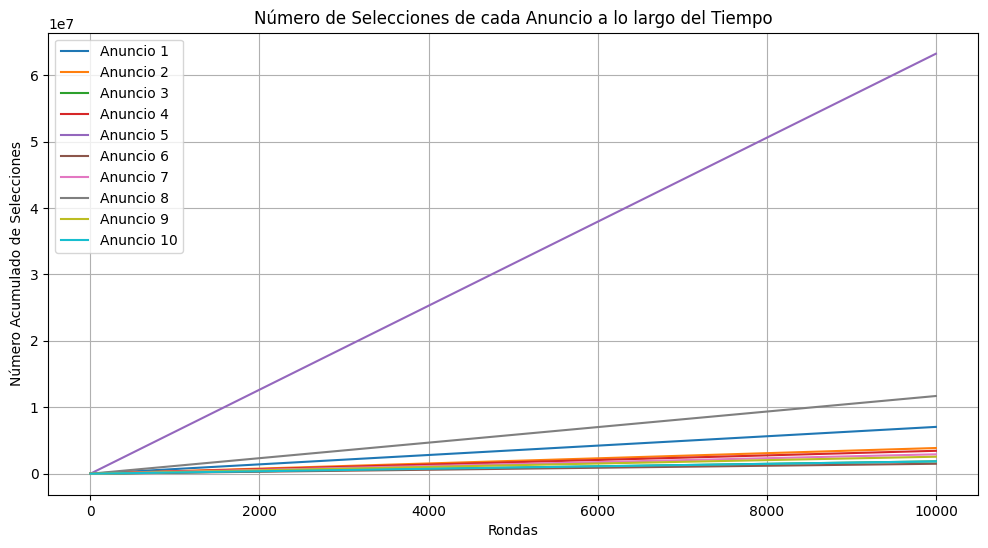

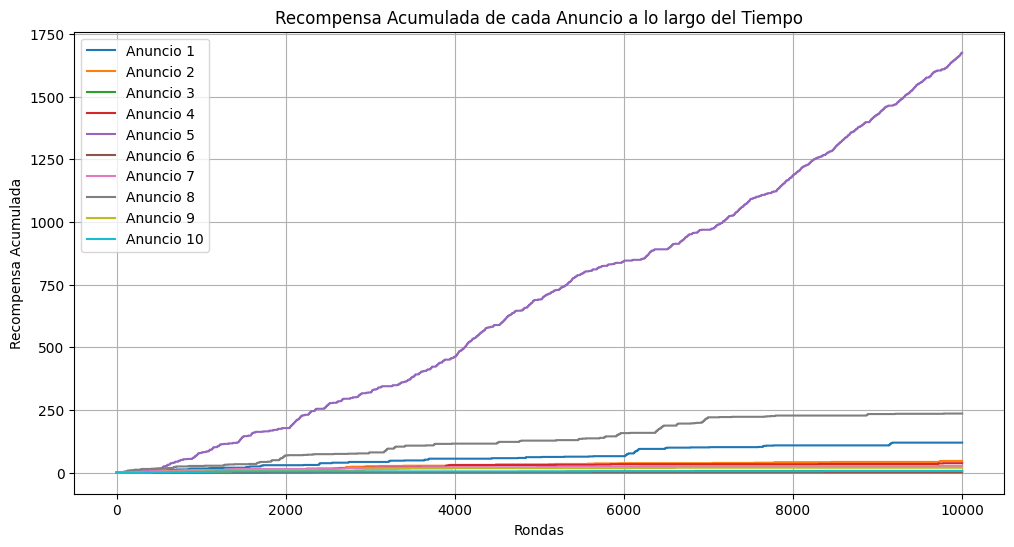

In [ ]:
# prompt: quiero un gráfico donde pueda ver el numero de selecciones y otro con la reward acumulada de cada anuncia con el paso del tiempo

import matplotlib.pyplot as plt
import numpy as np
# ## Visualising the results

# Create a plot for the number of selections of each ad over time
selection_counts_over_time = np.array([numbers_of_selections] * N)
cumulative_selections = np.cumsum(selection_counts_over_time, axis=0)

plt.figure(figsize=(12, 6))
for i in range(d):
    plt.plot(range(1, N + 1), cumulative_selections[:, i], label=f'Anuncio {i+1}')

plt.title('Número de Selecciones de cada Anuncio a lo largo del Tiempo')
plt.xlabel('Rondas')
plt.ylabel('Número Acumulado de Selecciones')
plt.legend()
plt.grid(True)
plt.show()


# Create a plot for the cumulative reward of each ad over time
cumulative_rewards_over_time = np.array([sums_of_rewards] * N)
# This part requires re-simulating or storing rewards per ad at each step
# For simplicity, let's assume we can reconstruct or store this information

# Since the current code only stores final sums, we need to reconstruct the cumulative reward over time.
# This requires iterating through the selections and rewards again to build the time series.

cumulative_rewards_per_ad_series = np.zeros((N, d))
current_rewards = [0] * d

for n in range(N):
    ad_index = ads_selected[n]
    reward = dataset.values[n, ad_index]
    current_rewards[ad_index] += reward
    cumulative_rewards_per_ad_series[n, :] = current_rewards

plt.figure(figsize=(12, 6))
for i in range(d):
    plt.plot(range(1, N + 1), cumulative_rewards_per_ad_series[:, i], label=f'Anuncio {i+1}')

plt.title('Recompensa Acumulada de cada Anuncio a lo largo del Tiempo')
plt.xlabel('Rondas')
plt.ylabel('Recompensa Acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Visualising the results

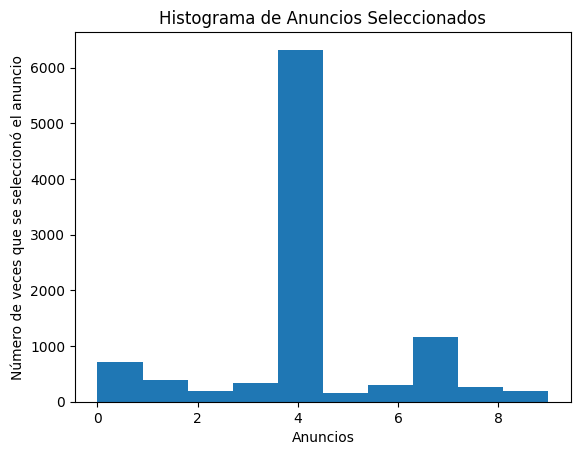

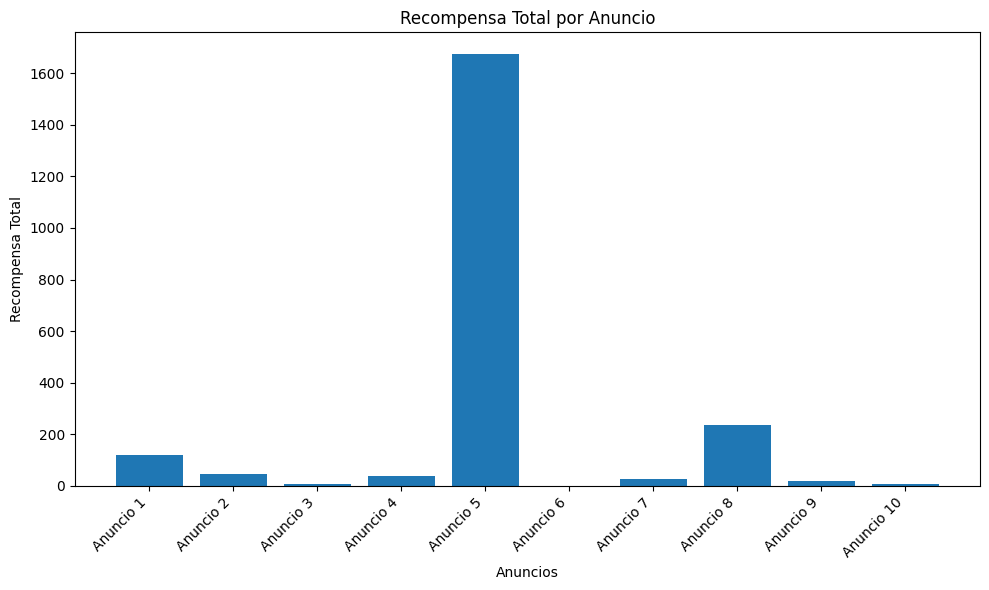

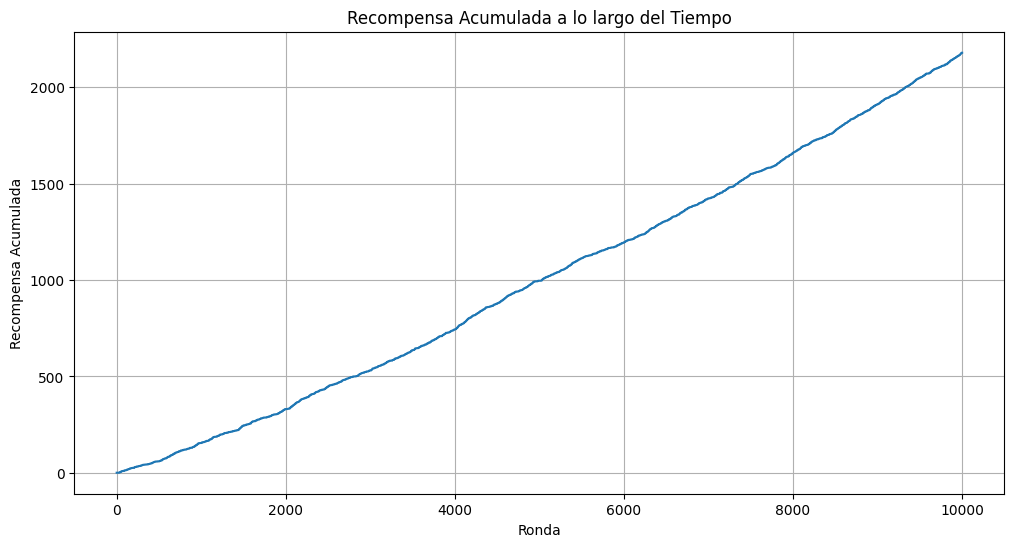

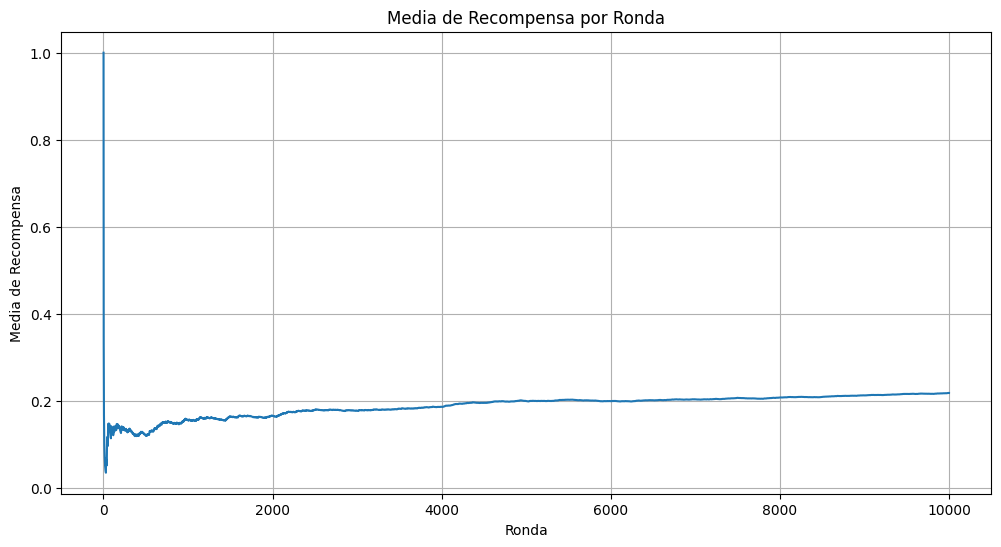

In [ ]:
# prompt: quiero que muestres una mucho mejor forma de representar esto visualmente

import matplotlib.pyplot as plt
import numpy as np
# Histograma para visualizar la frecuencia de selección de cada anuncio
plt.hist(ads_selected)
plt.title('Histograma de Anuncios Seleccionados')
plt.xlabel('Anuncios')
plt.ylabel('Número de veces que se seleccionó el anuncio')
plt.show()

# Gráfico de barras para visualizar la recompensa total por anuncio
rewards_by_ad = [sums_of_rewards[i] for i in range(d)]
ad_labels = [f'Anuncio {i+1}' for i in range(d)]

plt.figure(figsize=(10, 6))
plt.bar(ad_labels, rewards_by_ad)
plt.title('Recompensa Total por Anuncio')
plt.xlabel('Anuncios')
plt.ylabel('Recompensa Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de la recompensa acumulada a lo largo del tiempo
cumulative_reward_over_time = [sum(sums_of_rewards) for _ in range(N)] # Esto no es correcto para la recompensa acumulada, necesita recalcularse
# Calculemos la recompensa acumulada correctamente
cumulative_rewards_per_step = []
current_cumulative_reward = 0
for ad_index, reward_value in zip(ads_selected, dataset.values[:, ads_selected]):
    current_cumulative_reward += reward_value # Esto tampoco es correcto
    # La recompensa para un paso 'n' es dataset.values[n, ads_selected[n]]
    cumulative_rewards_per_step.append(dataset.values[len(cumulative_rewards_per_step), ad_index])

cumulative_reward_over_time = np.cumsum(cumulative_rewards_per_step)


plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), cumulative_reward_over_time)
plt.title('Recompensa Acumulada a lo largo del Tiempo')
plt.xlabel('Ronda')
plt.ylabel('Recompensa Acumulada')
plt.grid(True)
plt.show()

# Gráfico de la media de recompensa por ronda
mean_reward_per_round = cumulative_reward_over_time / np.arange(1, N + 1)

plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), mean_reward_per_round)
plt.title('Media de Recompensa por Ronda')
plt.xlabel('Ronda')
plt.ylabel('Media de Recompensa')
plt.grid(True)
plt.show()